# Predict Credit Card Consumption

**Understanding the consumption pattern for credit cards at an individual consumer level is important for customer relationship management. This understanding allows banks to customize for consumers and make strategic marketing plans. Thus it is imperative to study the relationship between the characteristics of the consumers and their consumption patterns.   XYZ Bank has given a sample of their customers, along with their details like age, gender and other demographics. Also shared are information on liabilities, assets and history of transactions with the bank for each customer.   In addition to the above, data has been provided for a particular set of customers' credit card spend in the previous 3 months (April, May & June) and their expected average spend in the coming 3 months (July, August & September). Predict the average spend for a different set of customers in the test set for the coming 3 months.**

## Objective :


#### Predict the average spend for a different set of customers in the test set for the coming 3 months

* ##### data has been provided for a particular set of customers' credit card spend in the previous 3 months (April, May & June) and their expected average spend in the coming 3 months (July, August & September).



## Evaluation Criteria
The average predicted spend of customers for the next three months would be evaluated using 100*RMSLE where RMSLE is Root of Mean Squared Logarithmic Error  

## Data
#### train_HFhgVok.zip
train.zip contains train.csv and data_dictionary.csv.

* train.csv contains the training data with details of customers, along with their average credit card spend for the next three months
* Data_Dictionary.xlsx contains a brief description of each variable provided in the training and test set.
 

#### test_pqNh56L.csv
test.csv contains details of the customers for which the participants need to predict the average spend for the next three months



## Variable	Definition
* id	Unique ID for the Customer
* cc_cons	(Target) Average Credit Card Spend in next three months
 


 

In [1]:
# Import all required modules 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import zipfile 

#### extract zip file and reading it

In [2]:

with zipfile.ZipFile('train_bFQbE3f.zip','r') as zip_ref:
  a=zip_ref.extractall('Data')
  print(zip_ref.namelist())

['Data_Dictionary.xlsx', '__MACOSX/', '__MACOSX/._Data_Dictionary.xlsx', 'train.csv', '__MACOSX/._train.csv']


In [3]:

file=pd.read_csv('Data/train.csv')
file.head(10)

,id,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,...,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
0,23334,saving,M,63,305,7695.00,NaN,479.00,NaN,622.00,...,2.0,45000.0,20215.85,1279.37,7.0,3.0,470.0,NaN,0.00,435
1,20329,current,M,33,326,52702.00,988.72,29873.00,NaN,1087.00,...,10.0,150000.0,122037.66,55390.00,8.0,19.0,27000.0,NaN,4963.33,1921
2,17679,current,M,44,264,10800.49,3215.52,21659.64,1607.0,1168.00,...,7.0,13800.0,46827.00,29297.91,6.0,19.0,20800.0,NaN,0.00,1970
3,16428,saving,M,44,233,20936.00,NaN,2094.00,NaN,11778.50,...,1.0,19300.0,5426.55,7544.00,3.0,1.0,5300.0,NaN,1238.18,21579
4,18721,saving,F,35,324,1183.83,NaN,3656.29,NaN,945.00,...,3.0,3000.0,26178.05,53483.00,4.0,4.0,45000.0,NaN,0.00,1814
5,4340,current,M,26,233,53819.88,1371.00,4712.92,2220.0,1048.00,...,22.0,20603.0,31189.26,33183.13,7.0,31.0,20890.0,NaN,0.00,626
6,28060,current,F,30,683,1495.00,4237.00,2212.00,5292.0,1964.00,...,24.0,24782.0,27984.33,81517.00,3.0,31.0,50000.0,NaN,0.00,2052
7,746,current,M,32,892,1847.00,5976.00,1347.80,4112.0,669.00,...,19.0,30281.0,39320.36,34332.00,3.0,23.0,31663.0,NaN,0.00,434
8,41628,current,M,37,233,9214.92,NaN,95625.88,16423.0,11419.76,...,28.0,51555.0,285663.35,254939.15,25.0,34.0,92800.0,NaN,0.00,10331
9,16836,saving,M,47,233,9191.31,NaN,8327.55,NaN,14642.00,...,NaN,NaN,NaN,503.00,1.0,0.0,275.0,NaN,0.00,2437


In [4]:
file_info=pd.read_excel('Data/Data_Dictionary.xlsx')
file_info

,Variable,Description
0,id,Unique ID for every Customer
1,account_type,Account Type – current or saving
2,gender,Gender of customer
3,age,Age of customer
4,region_code,Code assigned to region of residence (has order)
5,cc_cons_apr,Credit card spend in April
6,dc_cons_apr,Debit card spend in April
7,cc_cons_may,Credit card spend in May
8,dc_cons_may,Debit card spend in May
9,cc_cons_jun,Credit card spend in June


In [5]:
file.shape

(32820, 44)

M    28106
F     4714
Name: gender, dtype: int64


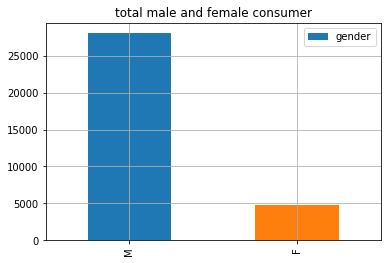

In [6]:
# To check gender counts.
Ge_count=file.iloc[:,2].value_counts()
print(Ge_count)
barlist=Ge_count.plot(kind='bar')
#barlist.set_color('r')
plt.title('total male and female consumer')
plt.legend()
plt.grid()
plt.show()

FRom above bar Graph, it is obeserved :
* female customer's account is too low as compared to Male customer.

In [7]:
file.columns

Index(['id', 'account_type', 'gender', 'age', 'region_code', 'cc_cons_apr',
       'dc_cons_apr', 'cc_cons_may', 'dc_cons_may', 'cc_cons_jun',
       'dc_cons_jun', 'cc_count_apr', 'cc_count_may', 'cc_count_jun',
       'dc_count_apr', 'dc_count_may', 'dc_count_jun', 'card_lim',
       'personal_loan_active', 'vehicle_loan_active', 'personal_loan_closed',
       'vehicle_loan_closed', 'investment_1', 'investment_2', 'investment_3',
       'investment_4', 'debit_amount_apr', 'credit_amount_apr',
       'debit_count_apr', 'credit_count_apr', 'max_credit_amount_apr',
       'debit_amount_may', 'credit_amount_may', 'credit_count_may',
       'debit_count_may', 'max_credit_amount_may', 'debit_amount_jun',
       'credit_amount_jun', 'credit_count_jun', 'debit_count_jun',
       'max_credit_amount_jun', 'loan_enq', 'emi_active', 'cc_cons'],
      dtype='object')

In [8]:
#file.isnull().sum()

In [9]:
file2=file.loc[:,['id','cc_cons_apr','cc_cons_may','cc_cons_jun','cc_count_apr','cc_count_may','cc_count_jun',
                 'card_lim','credit_count_apr','credit_count_may','credit_count_jun',
                  'credit_amount_apr','credit_amount_may','credit_amount_jun',
                 'max_credit_amount_apr','max_credit_amount_may','max_credit_amount_jun','cc_cons']]

In [10]:
file2.head()

,id,cc_cons_apr,cc_cons_may,cc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,card_lim,credit_count_apr,credit_count_may,credit_count_jun,credit_amount_apr,credit_amount_may,credit_amount_jun,max_credit_amount_apr,max_credit_amount_may,max_credit_amount_jun,cc_cons
0,23334,7695.00,479.00,622.0,2.0,1.0,3.0,150000.0,1.0,3.0,7.0,50259.0,114252.0,1279.37,50000.0,45000.0,470.0,435
1,20329,52702.00,29873.00,1087.0,11.0,14.0,11.0,176000.0,9.0,6.0,8.0,169812.0,174606.0,55390.00,70000.0,150000.0,27000.0,1921
2,17679,10800.49,21659.64,1168.0,6.0,9.0,6.0,65000.0,4.0,2.0,6.0,38942.0,23051.0,29297.91,11700.0,13800.0,20800.0,1970
3,16428,20936.00,2094.00,11778.5,9.0,6.0,6.0,600000.0,1.0,1.0,3.0,2294.0,19529.0,7544.00,2000.0,19300.0,5300.0,21579
4,18721,1183.83,3656.29,945.0,2.0,7.0,9.0,100000.0,1.0,2.0,4.0,10271.0,3194.0,53483.00,10000.0,3000.0,45000.0,1814


In [11]:
file2.isnull().sum()

id                          0
cc_cons_apr                 0
cc_cons_may                 0
cc_cons_jun                 0
cc_count_apr             2399
cc_count_may             1153
cc_count_jun             1590
card_lim                    9
credit_count_apr         1758
credit_count_may         2071
credit_count_jun         1528
credit_amount_apr        3302
credit_amount_may        3405
credit_amount_jun        1543
max_credit_amount_apr    3302
max_credit_amount_may    3405
max_credit_amount_jun    1543
cc_cons                     0
dtype: int64

In [12]:
file2=file2.replace(np.nan, 0)

In [13]:
file.isnull().sum()

id                           0
account_type                 0
gender                       0
age                          0
region_code                  0
cc_cons_apr                  0
dc_cons_apr              19052
cc_cons_may                  0
dc_cons_may              17339
cc_cons_jun                  0
dc_cons_jun              21297
cc_count_apr              2399
cc_count_may              1153
cc_count_jun              1590
dc_count_apr             19052
dc_count_may             17339
dc_count_jun             15497
card_lim                     9
personal_loan_active     30078
vehicle_loan_active      31974
personal_loan_closed     29937
vehicle_loan_closed      31195
investment_1             31394
investment_2             30482
investment_3             31488
investment_4             32414
debit_amount_apr          1890
credit_amount_apr         3302
debit_count_apr           1758
credit_count_apr          1758
max_credit_amount_apr     3302
debit_amount_may          2301
credit_a

#### Mean, Variance and Std-dev

In [14]:
# Mean, Variance and Std-dev with simple command
print(file.info())# information about data
print(file.describe())# df12.describe() is used to calculate count,mean,varience,
# standard deviations,mimimum ,maximum vaue and 25,50,75 percentile.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32820 entries, 0 to 32819
Data columns (total 44 columns):
id                       32820 non-null int64
account_type             32820 non-null object
gender                   32820 non-null object
age                      32820 non-null int64
region_code              32820 non-null int64
cc_cons_apr              32820 non-null float64
dc_cons_apr              13768 non-null float64
cc_cons_may              32820 non-null float64
dc_cons_may              15481 non-null float64
cc_cons_jun              32820 non-null float64
dc_cons_jun              11523 non-null float64
cc_count_apr             30421 non-null float64
cc_count_may             31667 non-null float64
cc_count_jun             31230 non-null float64
dc_count_apr             13768 non-null float64
dc_count_may             15481 non-null float64
dc_count_jun             17323 non-null float64
card_lim                 32811 non-null float64
personal_loan_active     2742 non-n

In [15]:
# Arraging 

In [16]:
from sklearn.model_selection import train_test_split
train , test = train_test_split(file2, test_size = 0.25)

x_train = train.drop(['id','cc_cons'], axis=1)
y_train = train['cc_cons']

x_test = test.drop(['id','cc_cons'], axis = 1)
y_test = test['cc_cons']
print("x_train",x_train.shape)
print("x_test",x_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

x_train (24615, 16)
x_test (8205, 16)
y_train (24615,)
y_test (8205,)


In [17]:
# truncated SVD for dimesionality reduction for 5 dimensions
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=5,n_iter=7)

x_train=svd.fit_transform(x_train )
print("TruncatedSVD :",x_train.shape)
x_test=svd.fit_transform(x_test )
print("TruncatedSVD :",x_test.shape)

TruncatedSVD : (24615, 5)
TruncatedSVD : (8205, 5)


In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

In [19]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_squared_log_error
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_log_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 1.4185175408839363
RMSE value for k=  2 is: 2.189227196691821
RMSE value for k=  3 is: 2.064006922090645
RMSE value for k=  4 is: 2.025692140398992
RMSE value for k=  5 is: 2.0358046092663695
RMSE value for k=  6 is: 2.010595376101403
RMSE value for k=  7 is: 2.0208784773596036
RMSE value for k=  8 is: 2.0182165309935094
RMSE value for k=  9 is: 2.0202326477549346
RMSE value for k=  10 is: 2.066375535606391
RMSE value for k=  11 is: 2.118061342780183
RMSE value for k=  12 is: 2.1718115929786603
RMSE value for k=  13 is: 2.2310128003668854
RMSE value for k=  14 is: 2.2733646009973096
RMSE value for k=  15 is: 2.257220183472108
RMSE value for k=  16 is: 2.243934985708251
RMSE value for k=  17 is: 2.235429813194056
RMSE value for k=  18 is: 2.222448676491088
RMSE value for k=  19 is: 2.208043147769537
RMSE value for k=  20 is: 2.1946957445239477


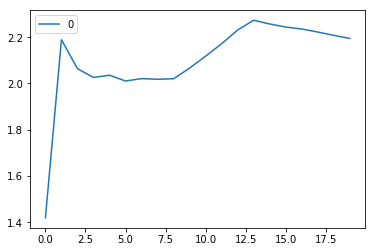

In [21]:
#plotting the rmse values against k values
%matplotlib inline
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [22]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9,11,13,15,17,19,21]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(x_train,y_train)
optimal_k=model.best_params_
print("best optimal_k", optimal_k)

best optimal_k {'n_neighbors': 21}


In [23]:
k=list(optimal_k.values())
k[0]

21

In [24]:
#reading test and submission files
test = pd.read_csv('test.csv')
test=test.loc[:,['id','cc_cons_apr','cc_cons_may','cc_cons_jun','cc_count_apr','cc_count_may','cc_count_jun',
                 'card_lim','credit_count_apr','credit_count_may','credit_count_jun',
                  'credit_amount_apr','credit_amount_may','credit_amount_jun',
                 'max_credit_amount_apr','max_credit_amount_may','max_credit_amount_jun','cc_cons']]
print(test.isnull().sum())
mean = test['cc_cons_may'].mean() #imputing cc_cons_may with mean
test['cc_cons'].fillna(0, inplace =True)
test['cc_cons_may'].fillna(mean, inplace =True)
mean1 = test['cc_cons_jun'].mean() #imputing cc_cons_may with mean
test['cc_cons_jun'].fillna(mean1, inplace =True)
test=test.replace(np.nan, 0)
print(test.isnull().sum())

id                          0
cc_cons_apr                 0
cc_cons_may                 1
cc_cons_jun                 1
cc_count_apr              493
cc_count_may              247
cc_count_jun              309
card_lim                    3
credit_count_apr          352
credit_count_may          414
credit_count_jun          300
credit_amount_apr         664
credit_amount_may         690
credit_amount_jun         304
max_credit_amount_apr     664
max_credit_amount_may     690
max_credit_amount_jun     304
cc_cons                  6538
dtype: int64
id                       0
cc_cons_apr              0
cc_cons_may              0
cc_cons_jun              0
cc_count_apr             0
cc_count_may             0
cc_count_jun             0
card_lim                 0
credit_count_apr         0
credit_count_may         0
credit_count_jun         0
credit_amount_apr        0
credit_amount_may        0
credit_amount_jun        0
max_credit_amount_apr    0
max_credit_amount_may    0
max_credit_amou

/opt/app-root/lib/python3.6/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [25]:
submission = pd.read_csv('SampleSubmission.csv')
print(submission.shape)
print(test.shape)
#submission=submission[0:len(test)]
submission['id'][0:len(test)]= test['id']
submission['cc_cons'] = test['cc_cons']
print(submission.shape)

(14067, 2)
(6538, 18)
(14067, 2)


In [26]:
test.head()

,id,cc_cons_apr,cc_cons_may,cc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,card_lim,credit_count_apr,credit_count_may,credit_count_jun,credit_amount_apr,credit_amount_may,credit_amount_jun,max_credit_amount_apr,max_credit_amount_may,max_credit_amount_jun,cc_cons
0,6975,17942.70,1656.00,4551.00,6.0,2.0,6.0,75000.0,2.0,3.0,2.0,25279.0,15416.52,5154.0,20000.0,10000.0,5000.0,0.0
1,43223,44870.36,34177.00,25889.21,13.0,19.0,36.0,116000.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
2,45502,1073.00,4141.00,6740.29,3.0,5.0,2.0,40000.0,5.0,4.0,3.0,105813.0,65227.00,37762.0,39000.0,26926.0,29352.0,0.0
3,12368,33060.58,3797.12,291.00,16.0,12.0,15.0,86000.0,5.0,4.0,7.0,59640.0,63393.00,89425.0,28753.0,57185.0,32696.0,0.0
4,40415,18236.90,30513.30,20395.28,42.0,38.0,20.0,250000.0,1.0,1.0,3.0,25154.0,45120.00,34275.0,25000.0,45000.0,19000.0,0.0


In [27]:
test = test.drop(['id','cc_cons'], axis = 1)

In [28]:
submission.head()

,id,cc_cons
0,6975,0.0
1,43223,0.0
2,45502,0.0
3,12368,0.0
4,40415,0.0


In [29]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='median')
imp.fit(test)
test=imp.transform(test)
test.shape

(6538, 16)

In [30]:
test=svd.fit_transform(test )
print("TruncatedSVD :",test.shape)

TruncatedSVD : (6538, 5)


In [31]:
#test
#preprocessing test dataset

test_scaled = scaler.fit_transform(test)
test = pd.DataFrame(test_scaled)

In [32]:

x_train = file2.drop(['id','cc_cons'], axis=1)
y_train = file2['cc_cons']
x_train=svd.fit_transform(x_train)
print("TruncatedSVD :",x_train.shape)
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

TruncatedSVD : (32820, 5)


In [33]:

model = neighbors.KNeighborsRegressor(n_neighbors = 21)

model.fit(x_train, y_train)  #fit the model
pred=model.predict(test) #make prediction on test set
#error = sqrt(mean_squared_log_error(y_test,pred)) #calculate rmse
#rmse_val.append(error) #store rmse values
#print('RMSLE value for k= ' , k[0] , 'is:', error)

In [34]:
submission.head()

,id,cc_cons
0,6975,0.0
1,43223,0.0
2,45502,0.0
3,12368,0.0
4,40415,0.0


In [35]:
#test.head()

In [36]:

#predicting on the test set and creating submission file
#predict = model.predict(test)
from statistics import median 
submission['cc_cons'][0:len(test)] = pred
submission['cc_cons'][len(test):len(submission)] =median(pred)
submission.to_csv('submit_file_knn.csv',index=False)


/opt/app-root/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/opt/app-root/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [37]:

print(median(pred))

30319.119047619046


RMSE= 3.161586465222122


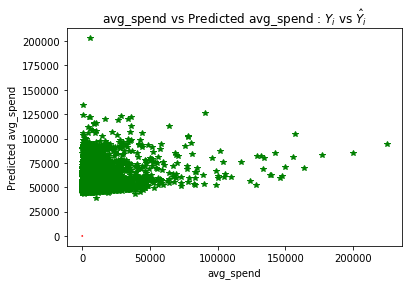

In [38]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train, y_train)
Y_pred = lm.predict(x_test)
error=abs(y_test-Y_pred)
total_error = np.dot(error,error)
# Compute RMSE
rmse_lr= sqrt(mean_squared_log_error(abs(y_test),abs(Y_pred)))
print('RMSE=',rmse_lr)
#plt.show()
plt.plot(y_test, Y_pred,'g*')
plt.plot([0,50],[0,50], 'r-')
plt.title("avg_spend vs Predicted avg_spend : $Y_i$ vs $\hat{Y}_i$")
plt.xlabel('avg_spend')
plt.ylabel('Predicted avg_spend')
plt.show()

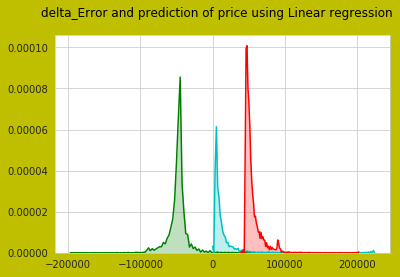

In [39]:
delta_y = y_test - Y_pred
import seaborn as sns
fig3 = plt.figure( facecolor='y', edgecolor='k')
fig3.suptitle('delta_Error and prediction of price using Linear regression', fontsize=12)
        
sns.set_style('whitegrid')
sns.kdeplot(np.array(delta_y),shade=True, color="g", bw=0.5)
sns.kdeplot(np.array(y_test),shade=True, color="c", bw=0.5)
sns.kdeplot(np.array(Y_pred),shade=True, color="r", bw=0.5)

In [40]:
models_performence1 = {
    'Model':[],
    'Batch_Size':[],
    'RMSE': [], 
    'MSE':[],
    'Iteration':[],
    'Optimal learning Rate':[],
    
  
}
columns = ["Model","Batch_Size","RMSE","MSE", "Iteration", "Optimal learning Rate"]
pd.DataFrame(models_performence1, columns=columns)

,Model,Batch_Size,RMSE,MSE,Iteration,Optimal learning Rate


In [41]:
from sklearn import linear_model
import warnings
warnings.filterwarnings("ignore")
#Here, alpha is as learning rate

def sgdreg_function(x,initial_batch_size):
    #initial_batch_size=100
    batch=[]
    
    for l in range(x):
        batch_size_value= initial_batch_size + initial_batch_size * l
        batch.append(batch_size_value)
        z=0
        scale_max=np.max(y_test[0:batch_size_value])
        
        Learning_rate=1 # initial learning rate=1
        score=[]
        LR=[] # storing value for learning rate
        Total_score=[]
        epoch1=[]
        global delta_error
        delta_error=[]
        Y_Test=[]
        global Y_hat_Predicted
        Y_hat_Predicted=[]
        test_cost=[]
        train_cost=[]
        n_iter=100
        for k in range(1,batch_size_value+1):
            # Appending learning rate 
            LR.append(Learning_rate) 
            
            # SGDRegressor
            sgdreg = linear_model.SGDRegressor(penalty='none', 
                                               alpha=Learning_rate
                                               , n_iter=100)
          
            
            yii=y_train[0:batch_size_value]
            xii=x_train[0:batch_size_value]
            xtt=x_test[0:batch_size_value]
            ytt=y_test[0:batch_size_value]
            Y_Test.append(ytt)
            
            clf=sgdreg.fit(xii,yii)
            Traing_score=clf.score(xii,yii)
            train_cost.append(Traing_score)
            training_error=1-Traing_score
             
            # p predicting on x_test
            
            y_hat = sgdreg.predict(xtt)
            #testing_score=clf.score()
            clf1=sgdreg.fit(xtt,ytt)
            Testing_score=clf1.score(xtt,ytt)
            test_cost.append(Testing_score)
            Testing_error=1-Testing_score
            Y_hat_Predicted.append(y_hat)
            # error = Y_test - y_prediction
            err = abs(ytt - y_hat)
            delta_error.append(err)
            score.append(Testing_score)
            # print(rmse)
            
            # Iteration 
            iteration_no=sgdreg.n_iter_
            epoch1.append(iteration_no)
            #print('Epoch=',iteration_no)
            #print('Learning_rate',Learning_rate) 

            Learning_rate=Learning_rate/2
            z+=1
        print("Training Error=",training_error)  
        print("Testing_error",Testing_error)
       
        models_performence1['Model'].append('sklearn.linear_model.SGDRegressor')
        # graph (Y_test) Prices Vs  (Y_prediction) Predicted prices
        fig4 = plt.figure( facecolor='c', edgecolor='k')
        fig4.suptitle('(Y_test) Prices Vs  (Y_prediction) Predicted prices: $Y_i$ vs $\hat{Y}_i$ with batch size='+str(batch[l]), fontsize=12)
        plt.plot(Y_Test,Y_hat_Predicted,'g*')
        plt.plot([0,batch_size_value],[0,batch_size_value], 'r-')
        
        plt.xlabel('Y_test')
        plt.ylabel('Y_predicted')
        plt.show()

 
        # Plot delta_Error and prediction of price
        fig3 = plt.figure( facecolor='y', edgecolor='k')
        fig3.suptitle('delta_Error and prediction of price with batch size='+str(batch[l]), fontsize=12)
        sns.set_style('darkgrid')
        Y_sklearn=np.array(sum(delta_error)/len(delta_error))
        sns.distplot(Y_sklearn,kde_kws={"color": "g", "lw": 3, "label": "Delta_error_sklearn"} )
        sns.kdeplot(np.array(y_hat),shade=True, color="r", bw=0.5)
        plt.show()
        
        # Plot epoch Vs  RMSE
        fig = plt.figure( facecolor='y', edgecolor='k')
        fig.suptitle('epoch Vs  RMSE with batch size='+str(batch[l]), fontsize=12)
        ax1 = fig.add_subplot(111)          
        plt.plot(epoch1,score,'m*',linestyle='dashed')
        plt.grid()
        plt.xlabel('epoch')
        plt.ylabel('RMSE with batch size=')
        
        
        models_performence1['Iteration'].append(sum(epoch1)/len(epoch1))
        
        # plot Iterations Vs Train Cost & Test cost
        fig4 = plt.figure( facecolor='c', edgecolor='k')
        fig4.suptitle('Iterations Vs Train Cost & Test cost with batch size='+str(batch[l]), fontsize=12)
        plt.plot(epoch1,train_cost,'m*',linestyle='dashed', label='Train cost')
        plt.plot(epoch1,test_cost,'r*', linestyle='dashed',label='Test cost')
        plt.legend(loc='lower left')
        plt.grid()
        plt.xlabel('Iterations ')
        plt.ylabel('Performance Cost  ')
        plt.show()

        # Plot Learning rate Vs  RMSE
        fig2 = plt.figure( facecolor='y', edgecolor='k')
        fig2.suptitle('Learning rate Vs  RMSE with batch size='+str(batch[l]), fontsize=12)
        ax2 = fig2.add_subplot(111)
        #ax2.set_title("Learning rate Vs  RMSE")
        plt.plot(LR,score,'m*',linestyle='dashed')
        plt.grid()
        plt.xlabel('Learning rate')
        plt.ylabel('RMSE')
        plt.show() 
        global best_Learning_rate
        best_Learning_rate=LR[score.index(min(score))]
        models_performence1['Optimal learning Rate'].append(best_Learning_rate)
        print('\nThe best value of best_Learning_rate is %d.' % (best_Learning_rate),7)
        MSEscore=abs(scale_max*sum(score)/len(score))
        score_value=np.sqrt(MSEscore)
        print('Batch Size',batch[l])
        
        models_performence1['Batch_Size'].append(batch[l])
        print("RMSE with batch size="+str(batch[l]),score_value)
        models_performence1['RMSE'].append(score_value)
        print("MSE with batch size="+str(batch[l]),MSEscore)
        models_performence1['MSE'].append(MSEscore)

Training Error= 1.0002088856816713
Testing_error 1.0020670479923728


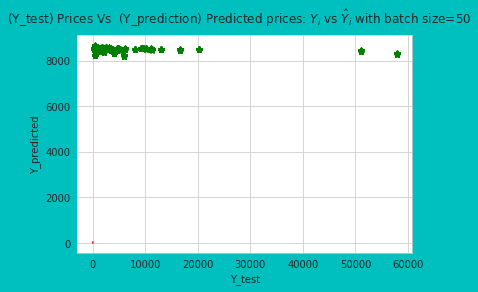

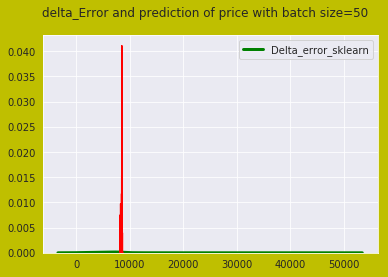

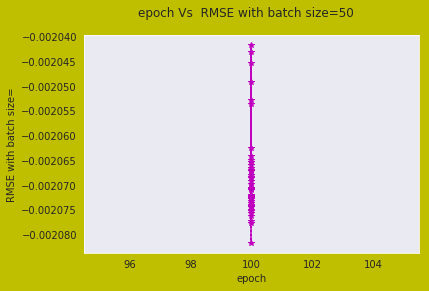

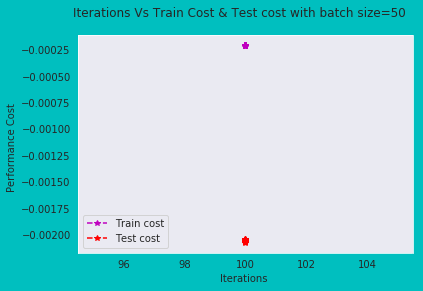

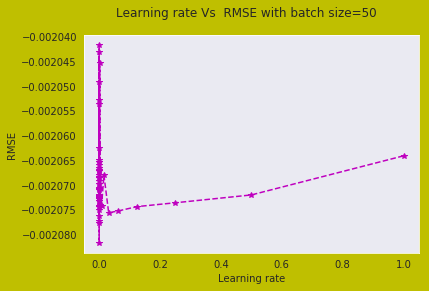


The best value of best_Learning_rate is 0. 7
Batch Size 50
RMSE with batch size=50 10.943775198211217
MSE with batch size=50 119.76621558898296
Training Error= 0.9998970060249173
Testing_error 1.0009082622514625


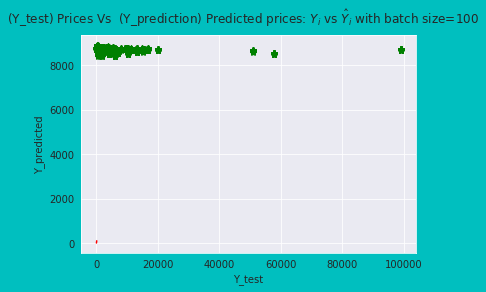

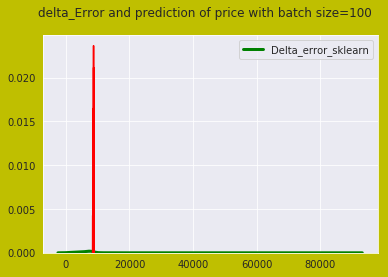

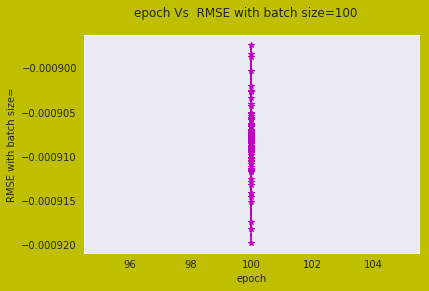

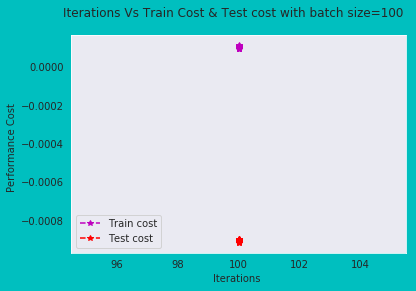

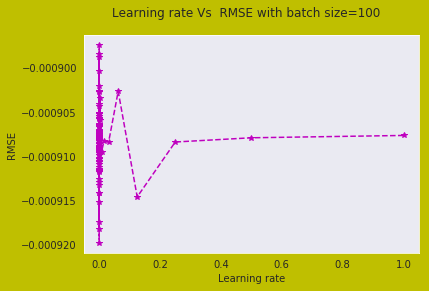


The best value of best_Learning_rate is 0. 7
Batch Size 100
RMSE with batch size=100 9.482678968432937
MSE with batch size=100 89.92120041836037
Training Error= 0.9999863671206397
Testing_error 1.000887211198438


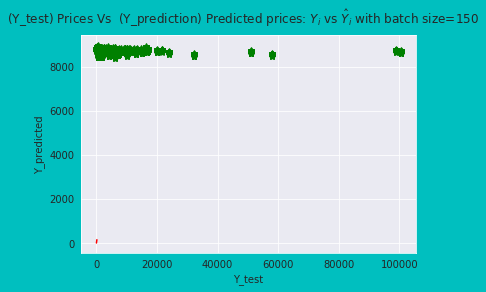

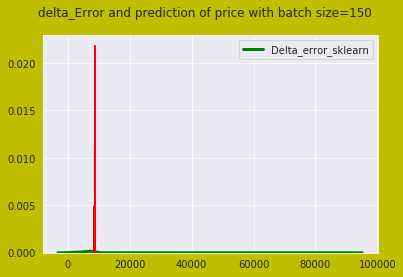

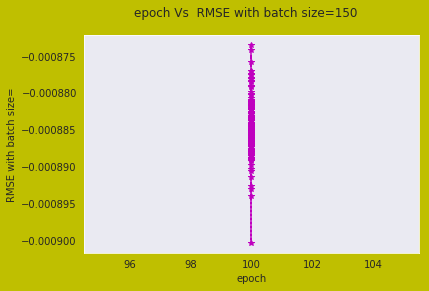

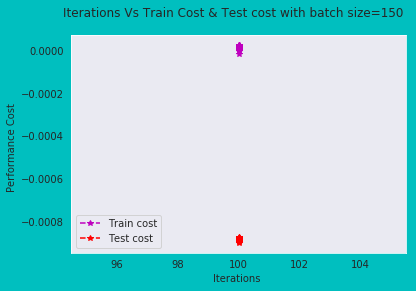

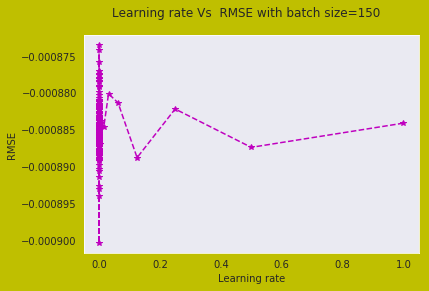


The best value of best_Learning_rate is 0. 7
Batch Size 150
RMSE with batch size=150 9.427325103139855
MSE with batch size=150 88.87445860029088
Training Error= 1.0000096281391593
Testing_error 1.000823383845235


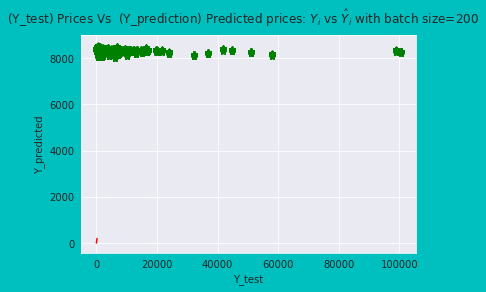

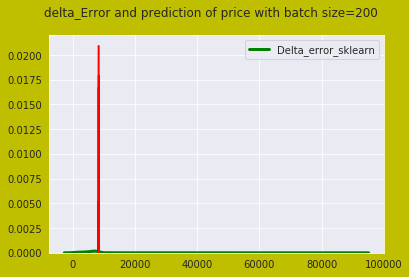

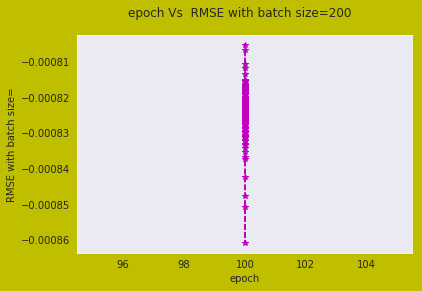

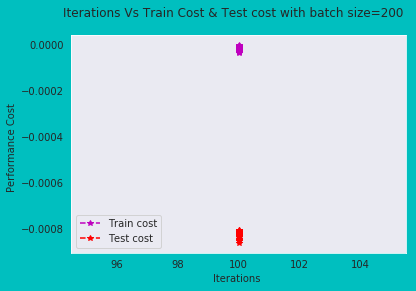

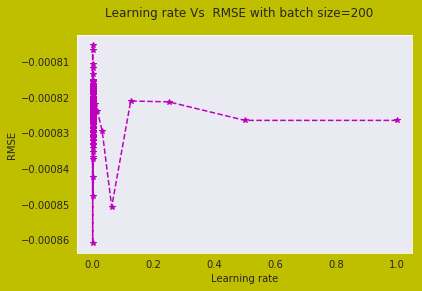


The best value of best_Learning_rate is 0. 7
Batch Size 200
RMSE with batch size=200 9.098861941424909
MSE with batch size=200 82.78928862911066


In [42]:
sgdreg_function(4,50)

In [43]:
columns = ["Model","Batch_Size","RMSE","MSE", "Iteration", "Optimal learning Rate"]
df=pd.DataFrame(models_performence1, columns=columns)

In [44]:
df

,Model,Batch_Size,RMSE,MSE,Iteration,Optimal learning Rate
0,sklearn.linear_model.SGDRegressor,50,10.943775,119.766216,100.0,2.328306e-10
1,sklearn.linear_model.SGDRegressor,100,9.482679,89.921200,100.0,1.654361e-24
2,sklearn.linear_model.SGDRegressor,150,9.427325,88.874459,100.0,1.490116e-08
3,sklearn.linear_model.SGDRegressor,200,9.098862,82.789289,100.0,8.271806e-25


In [45]:
#batch_size_value=5
sgdreg = linear_model.SGDRegressor(penalty='elasticnet', 
                                               max_iter=1000, tol=1e-3)
          
yii=y_train
xii=x_train
xtt=test

         
clf=sgdreg.fit(xii,yii)
Traing_score=clf.score(xii,yii)
       
training_error=1-Traing_score
             
            # p predicting on x_test
            
y_hat = sgdreg.predict(xtt)
          
print(y_hat)


iteration_no=sgdreg.n_iter_
         
print('Epoch=',iteration_no)
#print('Learning_rate',Learning_rate) 
            
            

[8488.7490047  8698.97867969 8507.44409721 ... 8923.76976292 8926.761804
 8013.62197745]
Epoch= 170


In [52]:
from statistics import median 
submission['cc_cons'][0:len(test)] = y_hat
submission['cc_cons'][len(test):len(submission)] =median(y_hat)
submission.to_csv('submit_file_SGRRegressor.csv',index=False)


In [53]:
print(np.mean(y_hat))
print(median(y_hat))

9006.10730195816
8718.778495981536


In [54]:
# Linear regression
lm.fit(x_train, y_train)
Y_pred = lm.predict(test)
submission['cc_cons'][0:len(test)] = Y_pred
submission['cc_cons'][len(test):len(submission)] =np.median(Y_pred)
submission.to_csv('submit_file_Linear_regression.csv',index=False)

In [49]:
print(np.mean(Y_pred))

33107.79284416863


Conclusion:
* 